## Simulación Graficas Interactivas

Al modelo de simulación de la venta de boletos de un teatro/cine agregar la simulación grafica 2D/3D utilizando cualquier libreria grafica, por ejemplo pygame/tkinter, etc. generar un informe en formato PDF que me permita evidenciar la simulación y generar una grafica/reporte de los resultados.

In [31]:
import collections
import random
import simpy

llegan = 30
tboletos = 50
tiempo = 120

boletos={}

def ventaBoletos(env, tboletoss, pelicula, teatro):

  with teatro.contador.request() as turno:

    resultado = yield turno | teatro.acabo[pelicula]

    if turno not in resultado:

      teatro.num_renegados[pelicula] += 1
      return

    if teatro.tboletoss[pelicula] < tboletoss:

      yield env.timeout(0.5) 
      return

    else:

      if pelicula in list(boletos.keys()):
        ste=boletos.get(pelicula)
        ste.append(tboletoss)
        boletos[pelicula]=ste

      else:

        boletos[pelicula]=[tboletoss]


    teatro.tboletoss[pelicula] -= tboletoss

    if teatro.tboletoss[pelicula] < 2:

      teatro.acabo[pelicula].succeed()
      teatro.tiempo_agotado[pelicula] = env.now
      teatro.tboletoss[pelicula] = 0

    yield env.timeout(1)


def llegadaClientes(env, teatro):
  while True:
    yield env.timeout(random.expovariate(1/0.5))
    pelicula = random.choices(teatro.peliculas, teatro.probabilidad, k=1)
    tboletoss = random.randint(1, 6)
    if teatro.tboletoss[pelicula[0]]:
      env.process(ventaBoletos(env, tboletoss, pelicula[0], teatro))


Teatro = collections.namedtuple('Teatro', 'contador, peliculas, probabilidad, tboletoss, acabo, tiempo_agotado, num_renegados')

print('Multicines')
env = simpy.Environment()

contador = simpy.Resource(env,capacity=1)
peliculas = ['Conjuro 3', 'La llorona', 'Masacre en Texas']
probabilidad=[0.2, 0.4, 0.6]
tboletoss = {pelicula: tboletos for pelicula in peliculas}
acabo = {pelicula: env.event() for pelicula in peliculas}
tiempo_agotado = {pelicula: None for pelicula in peliculas}
num_renegados = {pelicula: 0 for pelicula in peliculas}

teatro = Teatro(contador, peliculas, probabilidad, tboletoss, acabo, tiempo_agotado, num_renegados)
env.process(llegadaClientes(env, teatro))
env.run(until=tiempo)

# Analisis y resultados
for pelicula in peliculas:
  if teatro.acabo[pelicula]:
    print(' %s se agoto en %.1f minutos despues de estrenar' %(pelicula, teatro.tiempo_agotado[pelicula]))
    print(' %s personas se salieron de la fila ' %teatro.num_renegados[pelicula])
    
print(boletos)




Multicines
 Conjuro 3 se agoto en 44.7 minutos despues de estrenar
 0 personas se salieron de la fila 
 La llorona se agoto en 38.4 minutos despues de estrenar
 10 personas se salieron de la fila 
 Masacre en Texas se agoto en 29.4 minutos despues de estrenar
 13 personas se salieron de la fila 
{'Masacre en Texas': [3, 4, 4, 1, 3, 2, 3, 6, 2, 1, 6, 5, 3, 1, 6], 'La llorona': [1, 6, 2, 4, 3, 4, 2, 6, 5, 2, 4, 1, 4, 6], 'Conjuro 3': [5, 5, 5, 6, 1, 3, 1, 3, 2, 3, 2, 6, 6, 2]}


In [32]:
xx = []
for b in boletos:
    xx.append(teatro.tiempo_agotado[b])

    print(f'{b} se agoto a las: {teatro.tiempo_agotado[b]} minutos'  )

Masacre en Texas se agoto a las: 29.3980871853301 minutos
La llorona se agoto a las: 38.3980871853301 minutos
Conjuro 3 se agoto a las: 44.70930155213772 minutos


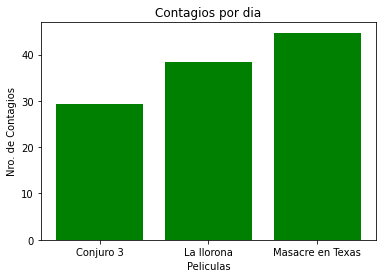

In [33]:


plt.bar(range(len(xx)), xx, align="center", color='g', tick_label=peliculas)
plt.title("Contagios por dia")
plt.xlabel("Peliculas")
plt.ylabel("Nro. de Contagios")
plt.show()

In [34]:
from turtle import color
import simpy
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class ClockAndData: 
    def __init__(self, canvas, peliculas, y1, y2, y3, time): 
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3
        self.peliculas = peliculas
        self.canvas = canvas
        self.step_acum=0
        self.step_x1=[0]
        self.step_y1=[0]
        self.step_x2=[0]
        self.step_y2=[0]
        self.step_x3=[0]
        self.step_y3=[0]
        data_plot.draw()
        self.canvas.update() 

    def tick(self, y1, y2, y3, time): 

        a1.cla()

        self.step_x1.append(time)
        self.step_y1.append(y1)

        self.step_x2.append(time)
        self.step_y2.append(y2)

        self.step_x3.append(time)
        self.step_y3.append(y3)

        a1.set_title("Conjuro 3")
        a1.set_xlabel("Tiempo")
        a1.set_ylabel("Boletos vendidos")
        a1.step(self.step_x1, self.step_y1, color='yellow')

        a1.legend(['Conjuro 3'])

        a2.set_title("La llorona")
        a2.set_xlabel("Tiempo")
        a2.set_ylabel("Boletos vendidos")
        a2.step(self.step_x2, self.step_y2, color='green')

        a2.legend(['La llorona'])

        a3.set_title("Masacre en Texas")
        a3.set_xlabel("Tiempo")
        a3.set_ylabel("Boletos vendidos")
        a3.step(self.step_x3, self.step_y3, color='brown')

        a3.legend(['Masacre en Texas'])

        data_plot.draw()
        self.canvas.update() 

main = tk.Tk()
main.title("Simulacion Tickets Comprados")

top_frame = tk.Frame(main)

canvas = tk.Canvas(main, width = 1300, height = 150, bg = "white")
canvas.pack(side=tk.BOTTOM, expand = False)

f = plt.Figure()

a1=f.add_subplot(1,3,1)
a1.plot()

a2=f.add_subplot(1,3,2)
a2.plot()

a3=f.add_subplot(1,3,3)
a3.plot()

data_plot = FigureCanvasTkAgg(f, master=main)
data_plot.get_tk_widget().config(height = 400)
data_plot.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

canvas.pack()

clock = ClockAndData(canvas, peliculas, 0, 0, 0, 0) 

def create_clock(env):
    i=0

    while True: 
        
        yield env.timeout(random.expovariate(1/0.5))
        
        try:
            clock.tick(boletos.get('Masacre en Texas')[i], boletos.get('La llorona')[i], boletos.get('Conjuro 3')[i], env.now)
            i+=1
        except:
            break            

env = simpy.Environment()
env.process(create_clock(env)) 
env.run(until = tiempo)

main.mainloop()